resultsTrue0.05.pkl
resultsTrue0.045.pkl
resultsTrue0.04.pkl
resultsTrue0.035.pkl
resultsTrue0.03.pkl
resultsTrue0.025.pkl
resultsTrue0.02.pkl
resultsTrue0.015.pkl
resultsTrue0.pkl
resultsFalse0.05.pkl
resultsFalse0.045.pkl
resultsFalse0.04.pkl
resultsFalse0.035.pkl
resultsFalse0.03.pkl
resultsFalse0.025.pkl
resultsFalse0.02.pkl
resultsFalse0.015.pkl
resultsFalse0.pkl


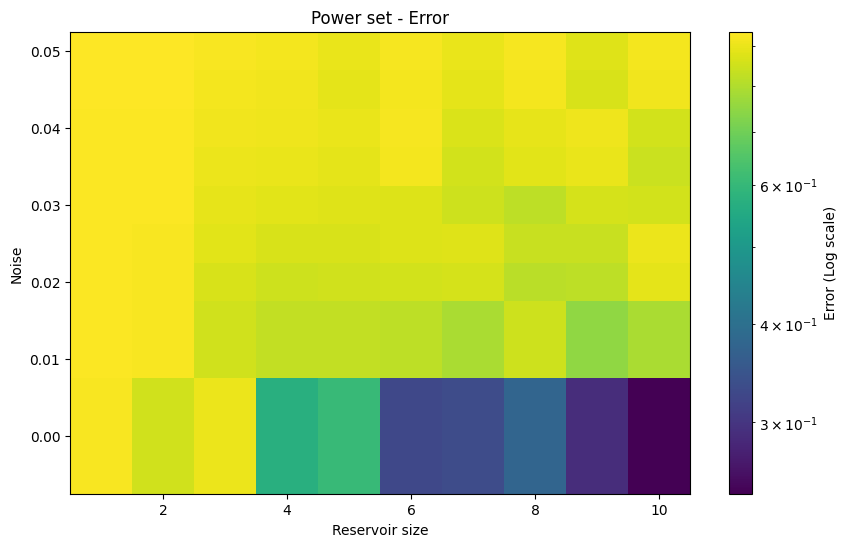

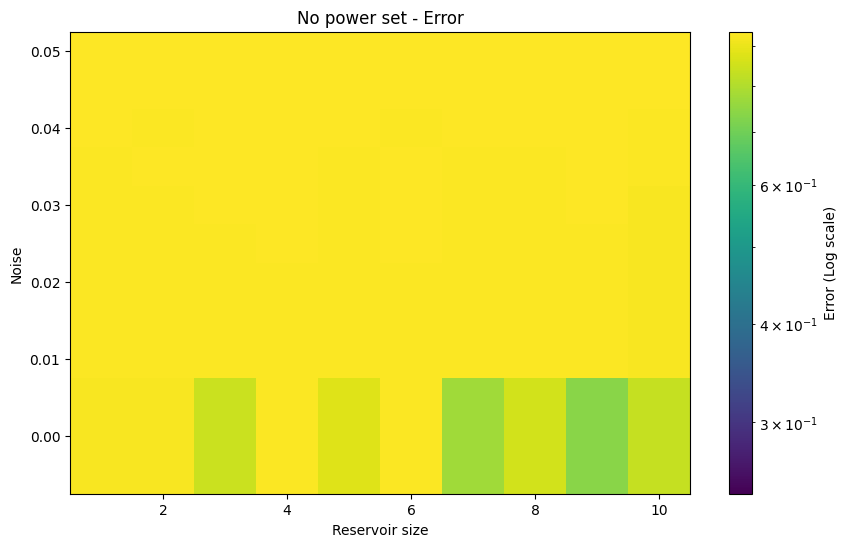

In [155]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import pickle as pkl

def get_best_per_size(data):
    sizes = np.unique(data[:, 1])
    best_values = {}
    for size in sizes:
        size_data = data[data[:, 1] == size]
        best_value = np.min(size_data[:, 0])
        best_values[size] = best_value
    return best_values

# list of all noise values
noise_values = [0.05, 0.045, 0.04, 0.035, 0.03, 0.025, 0.02, 0.015, 0]
all_best_values = {}

# Load all data and find best values per size
for power_set_str in ['True', 'False']:
    for noise in noise_values:
        file_name = f'results{power_set_str}{noise}.pkl'
        print(file_name)
        with open(file_name, 'rb') as f:
            nrmse = pkl.load(f)
        data = np.array(nrmse)
        all_best_values[(power_set_str, noise)] = get_best_per_size(data)
        
keys = list(all_best_values[('False', noise_values[0])].keys())[:10]

# Get min and max error for color scale across both powerset true and false
min_error = min(min(all_best_values[(power_set_str, noise)].values()) for power_set_str in ['True', 'False'] for noise in noise_values)
max_error = max(max(all_best_values[(power_set_str, noise)].values()) for power_set_str in ['True', 'False'] for noise in noise_values)

# Define the normalizer
norm = colors.LogNorm(vmin=min_error, vmax=max_error)

for power_set_str in ['True', 'False']:
    plt.figure(figsize=(10, 6))
    X = np.array(keys)  # Reservoir sizes
    Y = np.array(noise_values)  # Noise values
    Z = np.array([[all_best_values[(power_set_str, noise)][size] for size in keys] for noise in noise_values])  # Errors
    plt.pcolormesh(X, Y, Z, norm=norm, shading='auto', cmap='viridis')
    plt.title(f"{'Power set' if power_set_str == 'True' else 'No power set'} - Error")
    plt.xlabel('Reservoir size')
    plt.ylabel('Noise')
    plt.colorbar(label='Error (Log scale)')
    plt.show()

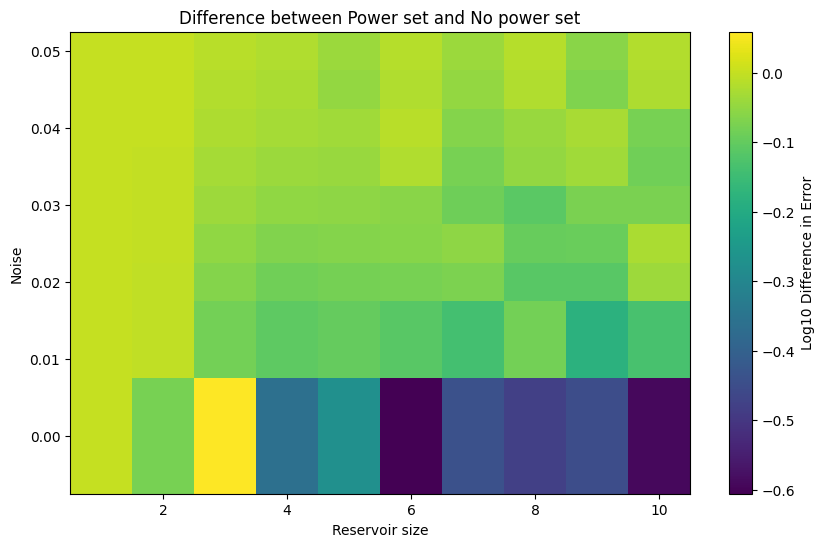

In [156]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import pickle as pkl

def get_best_per_size(data):
    sizes = np.unique(data[:, 1])
    best_values = {}
    for size in sizes:
        size_data = data[data[:, 1] == size]
        best_value = np.min(size_data[:, 0])
        best_values[size] = best_value
    return best_values


all_best_values = {}

# Load all data and find best values per size
for power_set_str in ['True', 'False']:
    for noise in noise_values:
        file_name = f'results{power_set_str}{noise}.pkl'
        with open(file_name, 'rb') as f:
            nrmse = pkl.load(f)
        data = np.array(nrmse)
        all_best_values[(power_set_str, noise)] = get_best_per_size(data)
def safe_log_diff(val):
    return np.log10(val) if val > 0 else np.nan

# Convert differences to log scale and replace negatives with NaNs
Z = np.array([[all_best_values[('True', noise)][size]-all_best_values[('False', noise)][size] for size in keys] for noise in noise_values])

# Get min and max difference for color scale
min_diff = np.nanmin(Z)
max_diff = np.nanmax(Z)

# Define the color map with white NaNs
cmap = plt.cm.viridis
cmap.set_bad(color='white')

plt.figure(figsize=(10, 6))
X = np.array(keys)  # Reservoir sizes
Y = np.array(noise_values)  # Noise values
plt.pcolormesh(X, Y, Z, vmin=min_diff, vmax=max_diff, shading='auto', cmap=cmap)
plt.title('Difference between Power set and No power set')
plt.xlabel('Reservoir size')
plt.ylabel('Noise')
plt.colorbar(label='Log10 Difference in Error')
plt.show()

            8             7            6           5          4
-8.459e-06 x + 0.0003606 x - 0.006427 x + 0.06219 x - 0.3543 x
          3         2
 + 1.203 x - 2.346 x + 2.362 x - 1.858
           8             7            6           5          4
-9.33e-06 x + 0.0003968 x - 0.007054 x + 0.06804 x - 0.3862 x
          3         2
 + 1.306 x - 2.534 x + 2.539 x - 1.922
            8             7            6           5          4
-9.815e-06 x + 0.0004369 x - 0.008087 x + 0.08064 x - 0.4693 x
          3         2
 + 1.613 x - 3.155 x + 3.172 x - 2.167
            8             7           6           5          4
-1.148e-05 x + 0.0005104 x - 0.00943 x + 0.09383 x - 0.5445 x
          3         2
 + 1.865 x - 3.631 x + 3.633 x - 2.34
           8             7            6           5          4
3.348e-06 x - 0.0001358 x + 0.002324 x - 0.02203 x + 0.1271 x
           3          2
 - 0.4568 x + 0.9842 x - 1.107 x - 0.4591
           8            7           6           5          4  

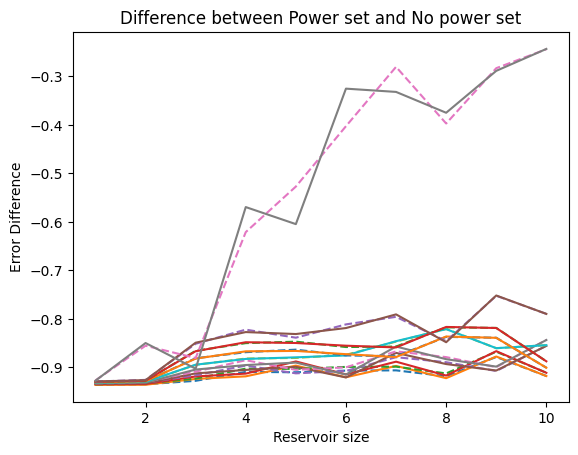

In [161]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import pickle as pkl

def get_best_per_size(data):
    sizes = np.unique(data[:, 1])
    best_values = {}
    for size in sizes:
        size_data = data[data[:, 1] == size]
        best_value = np.min(size_data[:, 0])
        best_values[size] = best_value
    return best_values


all_best_values = {}

# Load all data and find best values per size
for power_set_str in ['True', 'False']:
    for noise in noise_values:
        file_name = f'results{power_set_str}{noise}.pkl'
        with open(file_name, 'rb') as f:
            nrmse = pkl.load(f)
        data = np.array(nrmse)
        all_best_values[(power_set_str, noise)] = get_best_per_size(data)
def safe_log_diff(val):
    return np.log10(val) if val > 0 else np.nan

# Convert differences to log scale and replace negatives with NaNs
Z = np.array([[-all_best_values[('True', noise)][size] for size in keys] for noise in noise_values])
for i in range(len(Z)):
    z = np.polyfit(X, Z[i], 8)  # change 2 to any degree you wish to try out
    p = np.poly1d(z)
    print(p)
    plt.plot(X, p(X), linestyle='--') # plots a dashed line representing each polynomial fit
    plt.plot(X, Z[i])
plt.title('Difference between Power set and No power set')
plt.xlabel('Reservoir size')
plt.ylabel('Error Difference')
plt.show()

In [162]:
# def safe_log_diff(val):
#     return np.log10(val) if val > 0 else np.nan

# # Convert differences to log scale and replace negatives with NaNs
# Z = np.array([[safe_log_diff(-all_best_values[('True', noise)][size]+all_best_values[('False', noise)][size]) for size in keys] for noise in noise_values])

# slopes = [] 
# for i in range(len(Z)):
#     # Get mask of non-NaN values
#     valid_mask = ~np.isnan(Z[i])
#     z = np.polyfit(X[valid_mask], Z[i, valid_mask], 3)  # change 1 to any degree you wish to try out
#     slopes.append(z[0])
#     p = np.poly1d(z)
#     plt.plot(X[valid_mask], -p(X[valid_mask]), linestyle='--', label=f"Noise: {noise_values[i]}, Slope: {z[0]:.2f}")

# plt.title('Log Difference between Power set and No power set')
# plt.xlabel('Reservoir size')
# plt.ylabel('Noise')
# plt.legend()
# plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


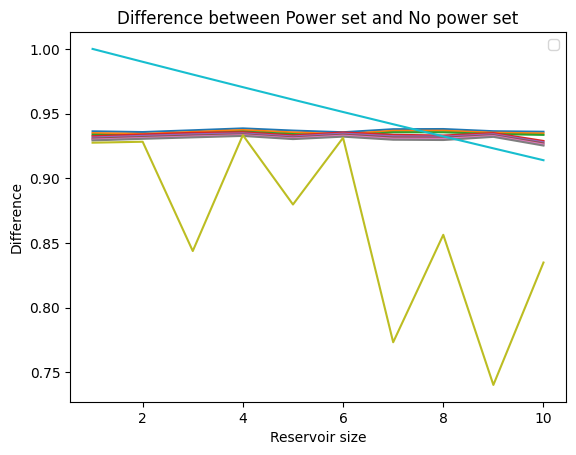

In [191]:
def safe_log_diff(val):
    return np.log10(val) if val > 0 else np.nan

# Convert differences to log scale and replace negatives with NaNs
Z = np.array([[(all_best_values[('False', noise)][size]) for size in keys] for noise in noise_values])

slopes = [] 
for i in range(len(Z)):
    # Get mask of non-NaN values
    #valid_mask = ~np.isnan(Z[i])
    #plt.yscale('log')
    #plt.xscale('log')
    plt.plot(X, Z[i])
#plt.plot(X, (X**(1/20)-1))
#plt.plot(X, np.exp(-1)-np.exp(-X))
plt.plot(X, np.exp((-X+1)/100))
plt.title('Difference between Power set and No power set')
plt.xlabel('Reservoir size')
plt.ylabel('Difference')
plt.legend()
plt.show()

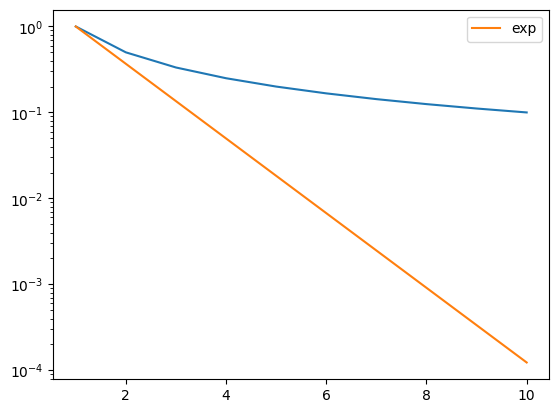

In [205]:
plt.plot(X, (1/X))
plt.plot(X, np.exp((-X+1)), label='exp')
plt.yscale('log')
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


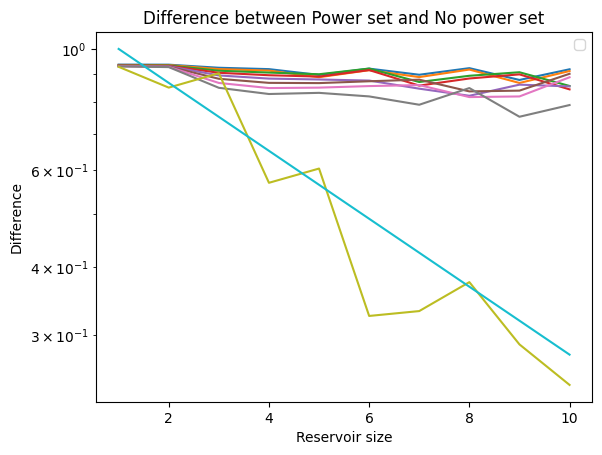

In [186]:
def safe_log_diff(val):
    return np.log10(val) if val > 0 else np.nan

# Convert differences to log scale and replace negatives with NaNs
Z = np.array([[(all_best_values[('True', noise)][size]) for size in keys] for noise in noise_values])

slopes = [] 
for i in range(len(Z)):
    # Get mask of non-NaN values
    #valid_mask = ~np.isnan(Z[i])
    plt.yscale('log')
    #plt.xscale('log')
    plt.plot(X, Z[i])
#plt.plot(X, (X**(1/20)-1))
#plt.plot(X, np.exp(-1)-np.exp(-X))
plt.plot(X, np.exp((-X+1)/7))
plt.title('Difference between Power set and No power set')
plt.xlabel('Reservoir size')
plt.ylabel('Difference')
plt.legend()
plt.show()

# The difference is essentially flat across reservoir size, despite there being many many more signals. 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


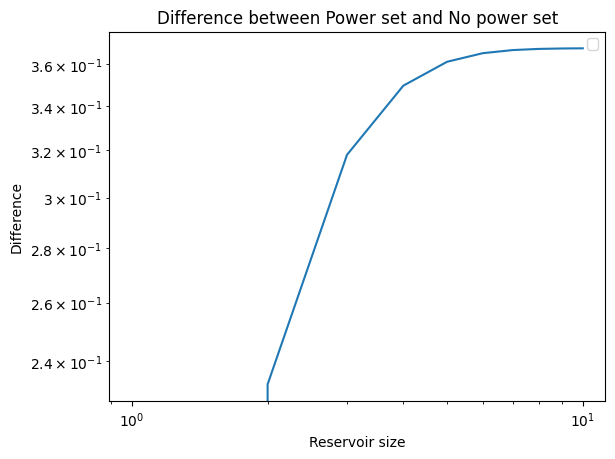

In [153]:
def safe_log_diff(val):
    return np.log10(val) if val > 0 else np.nan

# Convert differences to log scale and replace negatives with NaNs
Z = np.array([[(-all_best_values[('True', noise)][size]+all_best_values[('False', noise)][size]) for size in keys] for noise in [0]])

slopes = [] 
for i in range(len(Z)):
    # Get mask of non-NaN values
    #valid_mask = ~np.isnan(Z[i])
    #plt.plot(X, Z[i])
    plt.xscale('log')
    plt.yscale('log')
plt.plot(X, np.exp(-1)-np.exp(-X))
plt.title('Difference between Power set and No power set')
plt.xlabel('Reservoir size')
plt.ylabel('Difference')
plt.legend()
plt.show()

# For small values of noise our numerics failed due to the regularization, we need to fix this. But we have already seen that they fall off exponentially.